# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [57]:
data = pd.read_csv('/content/bullying_clusters2 (1).csv')
data.head()

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Body_weight,Cluster
0,14,1,0,0,2,3,0,4,0,0,0,2
1,13,1,0,1,2,3,0,1,0,0,0,2
2,15,1,0,1,2,3,3,1,0,1,0,2
3,13,1,0,4,1,3,0,3,0,0,0,1
4,14,1,0,4,1,2,0,0,4,0,2,1


In [58]:
data.drop(columns=['Miss_school_no_permission'], inplace=True)
data.head()

,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Other_students_kind_and_helpful,Parents_understand_problems,Missed_classes_or_school_without_permission,Body_weight,Cluster
0,14,1,0,0,2,3,4,0,0,0,2
1,13,1,0,1,2,3,1,0,0,0,2
2,15,1,0,1,2,3,1,0,1,0,2
3,13,1,0,4,1,3,3,0,0,0,1
4,14,1,0,4,1,2,0,4,0,2,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [59]:
x = data.drop(columns=['Cluster'])
y = data['Cluster']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(f'Banyaknya training: {x_train.shape}\n Banyaknya testing: {x_test.shape}')

Banyaknya training: (14796, 10)
 Banyaknya testing: (3700, 10)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### 1. Algoritma klasifikasi: random forest

In [62]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

### 2. Latih model

In [76]:
for name, model in models.items():
    cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
    model.fit(x_train_scaled, y_train)  # Latih model
    y_pred = model.predict(x_test_scaled)  # Prediksi
    acc = accuracy_score(y_test, y_pred)  # Evaluasi akurasi

    print(f"{name} - Cross-Validation: {cv_scores}")
    print(f"{name} - Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"{name} - Test Accuracy: {acc:.4f}\n")

Logistic Regression - Cross-Validation: [0.99932432 0.99831024 0.99594458 0.99662048 0.99797229]
Logistic Regression - Cross-Validation Mean Accuracy: 0.9976 ± 0.0012
Logistic Regression - Test Accuracy: 0.9984

Decision Tree - Cross-Validation: [0.99493243 0.99662048 0.99493072 0.99493072 0.99628253]
Decision Tree - Cross-Validation Mean Accuracy: 0.9955 ± 0.0008
Decision Tree - Test Accuracy: 0.9973

Random Forest - Cross-Validation: [0.9972973  0.99763434 0.99526867 0.99594458 0.99594458]
Random Forest - Cross-Validation Mean Accuracy: 0.9964 ± 0.0009
Random Forest - Test Accuracy: 0.9976

K-Nearest Neighbors - Cross-Validation: [0.99054054 0.99357891 0.98986144 0.98884758 0.98986144]
K-Nearest Neighbors - Cross-Validation Mean Accuracy: 0.9905 ± 0.0016
K-Nearest Neighbors - Test Accuracy: 0.9930



Pada tiap model memberikan tingkat akurasi yang tinggi. Akan tetapi cross validation memberikan nilai fold yang cukup konsisten sehingga tidak terjadi overfitting maupun underfitting

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

#### 1. Prediksi dengan data uji

In [66]:
for name, model in models.items():
  y_test_pred = model.predict(x_test_scaled)
  y_train_pred = model.predict(x_train_scaled)

#### 2. Evaluasi model

In [89]:
for name, model in models.items():
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  class_rep = classification_report(y_test, y_pred)
  conf_matrix_test = confusion_matrix(y_test, y_test_pred)
  conf_matrix_train = confusion_matrix(y_train, y_train_pred)

#### 3. Cetak hasil

In [90]:
for name, model in models.items():
  print(f'Model: {name}')
  print(f"Accuracy: {accuracy:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print("\nClassification Report:\n", class_rep)
  print("\nConfusion Matrix:\nTrain:\n", conf_matrix_train,'\nTest:\n', conf_matrix_test)
  print("="*50)

Model: Logistic Regression
Accuracy: 0.9935
F1-Score: 0.9935

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       463
           1       1.00      0.97      0.98       502
           2       1.00      1.00      1.00      2735

    accuracy                           0.99      3700
   macro avg       0.99      0.98      0.99      3700
weighted avg       0.99      0.99      0.99      3700


Confusion Matrix:
Train:
 [[ 1844     5     5]
 [   59  1926    20]
 [    1     0 10936]] 
Test:
 [[ 455    1    7]
 [  11  484    7]
 [   0    0 2735]]
Model: Decision Tree
Accuracy: 0.9935
F1-Score: 0.9935

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       463
           1       1.00      0.97      0.98       502
           2       1.00      1.00      1.00      2735

    accuracy                           0.99      3700
   macro avg       0.99    

#### 4. Cek overfitting/underfitting

In [93]:
for name, model in models.items():
  train_accuracy = model.score(x_train_scaled, y_train)
  test_accuracy = model.score(x_test_scaled, y_test)

  print(f"Model: {name}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}\n")


Model: Logistic Regression
Training Accuracy: 0.9979
Test Accuracy: 0.9984

Model: Decision Tree
Training Accuracy: 1.0000
Test Accuracy: 0.9973

Model: Random Forest
Training Accuracy: 1.0000
Test Accuracy: 0.9976

Model: K-Nearest Neighbors
Training Accuracy: 0.9939
Test Accuracy: 0.9930



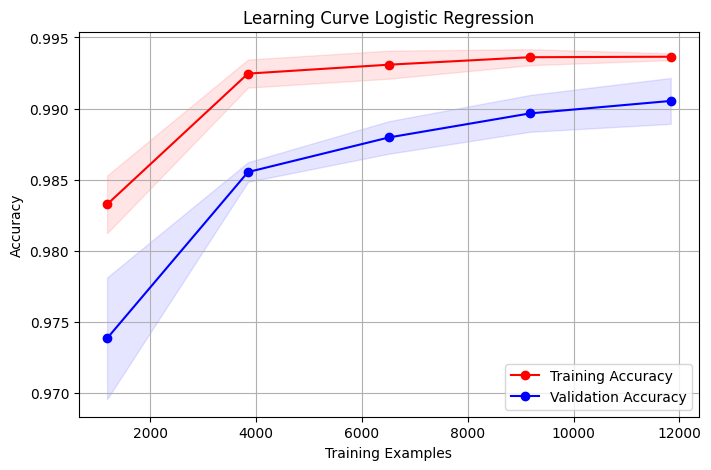

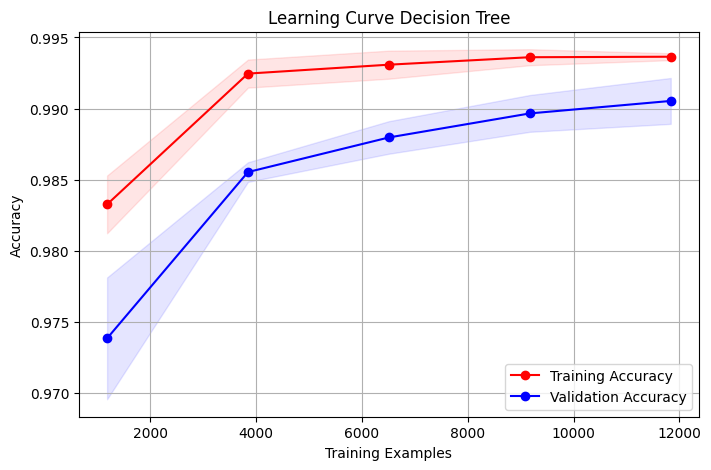

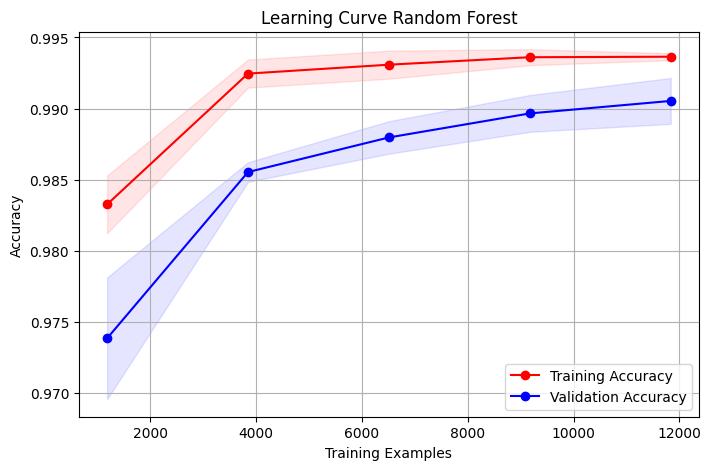

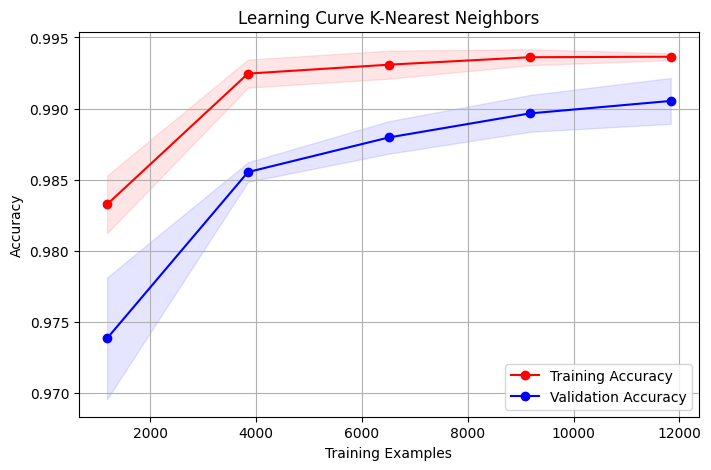

In [91]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
for name, model in models.items():
  # Hitung rata-rata dan standar deviasi
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(8,5))
  plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Accuracy")
  plt.plot(train_sizes, test_mean, 'o-', color="b", label="Validation Accuracy")
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="b")
  plt.xlabel("Training Examples")
  plt.ylabel("Accuracy")
  plt.title(f"Learning Curve {name}")
  plt.legend()
  plt.grid()
  plt.show()


Dari hasil evaluasi 4 model didapatkan bahwa model dapat mengklasifikasikan dengan baik dan tidak terjadi overfitting dan underfitting.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

#### 1. Logistic Regression

In [79]:
param_space_lr = {'C': Real(1e-3, 1e3, prior='log-uniform')}
bayes_lr = BayesSearchCV(LogisticRegression(), param_space_lr, cv=5, n_iter=20, scoring='accuracy', n_jobs=-1, random_state=42)
bayes_lr.fit(x_train_scaled, y_train)
print("Best parameters for Logistic Regression:", bayes_lr.best_params_)
print("Best score:", bayes_lr.best_score_)

Best parameters for Logistic Regression: OrderedDict([('C', 0.28881766539144715)])
Best score: 0.9977019719956524


#### 2. Decision tree

In [81]:
param_space_dt = {'max_depth': Integer(3, 20), 'min_samples_split': Integer(2, 20)}
bayes_dt = BayesSearchCV(DecisionTreeClassifier(), param_space_dt, cv=5, n_iter=20, scoring='accuracy', n_jobs=-1, random_state=42)
bayes_dt.fit(x_train_scaled, y_train)
print("Best parameters for Decision Tree:", bayes_dt.best_params_)
print("Best score:", bayes_dt.best_score_)

Best parameters for Decision Tree: OrderedDict([('max_depth', 7), ('min_samples_split', 2)])
Best score: 0.997228907684298


#### 3. Random forest

In [82]:
param_space_rf = {'n_estimators': Integer(50, 300), 'max_depth': Integer(5, 30), 'min_samples_split': Integer(2, 20)}
bayes_rf = BayesSearchCV(RandomForestClassifier(), param_space_rf, cv=5, n_iter=20, scoring='accuracy', n_jobs=-1, random_state=42)
bayes_rf.fit(x_train_scaled, y_train)
print("Best parameters for Random Forest:", bayes_rf.best_params_)
print("Best score:", bayes_rf.best_score_)

Best parameters for Random Forest: OrderedDict([('max_depth', 12), ('min_samples_split', 2), ('n_estimators', 256)])
Best score: 0.996350278125371


#### 4. KNN

In [83]:
param_space_knn = {'n_neighbors': Integer(1, 20), 'weights': ['uniform', 'distance']}
bayes_knn = BayesSearchCV(KNeighborsClassifier(), param_space_knn, cv=5, n_iter=20, scoring='accuracy', n_jobs=-1, random_state=42)
bayes_knn.fit(x_train_scaled, y_train)
print("Best parameters for KNN:", bayes_knn.best_params_)
print("Best score:", bayes_knn.best_score_)

Best parameters for KNN: OrderedDict([('n_neighbors', 6), ('weights', 'distance')])
Best score: 0.9915517934291168


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [84]:
tuned_models = {
    "Logistic Regression": bayes_lr.best_estimator_,
    "Decision Tree": bayes_dt.best_estimator_,
    "Random Forest": bayes_rf.best_estimator_,
    "KNN": bayes_knn.best_estimator_
}


> Evaluasi Model: Logistic Regression
Accuracy: 0.9986
F1-Score: 0.9986
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       1.00      0.99      1.00       502
           2       1.00      1.00      1.00      2735

    accuracy                           1.00      3700
   macro avg       1.00      1.00      1.00      3700
weighted avg       1.00      1.00      1.00      3700



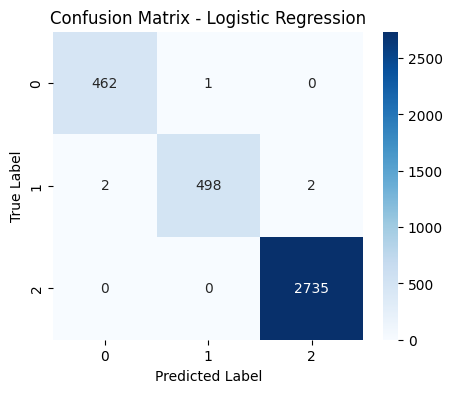


> Evaluasi Model: Decision Tree
Accuracy: 0.9978
F1-Score: 0.9978
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       0.99      0.99      0.99       502
           2       1.00      1.00      1.00      2735

    accuracy                           1.00      3700
   macro avg       1.00      1.00      1.00      3700
weighted avg       1.00      1.00      1.00      3700



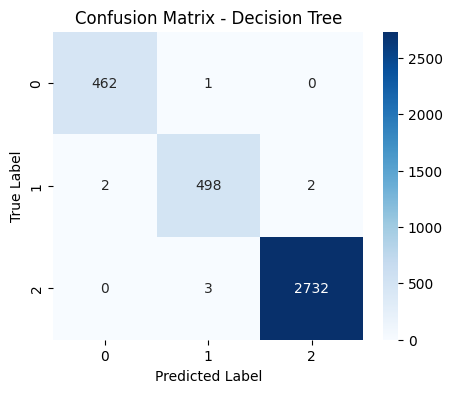


> Evaluasi Model: Random Forest
Accuracy: 0.9984
F1-Score: 0.9984
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       463
           1       1.00      0.99      0.99       502
           2       1.00      1.00      1.00      2735

    accuracy                           1.00      3700
   macro avg       1.00      1.00      1.00      3700
weighted avg       1.00      1.00      1.00      3700



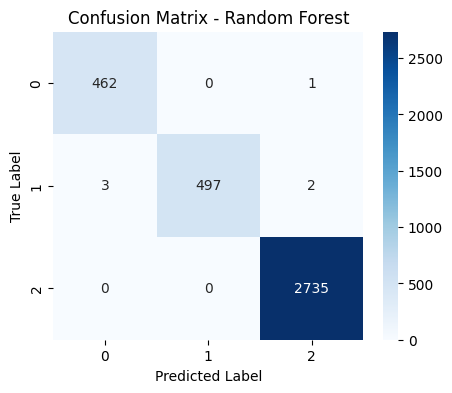


> Evaluasi Model: KNN
Accuracy: 0.9935
F1-Score: 0.9935
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       463
           1       1.00      0.97      0.98       502
           2       1.00      1.00      1.00      2735

    accuracy                           0.99      3700
   macro avg       0.99      0.98      0.99      3700
weighted avg       0.99      0.99      0.99      3700



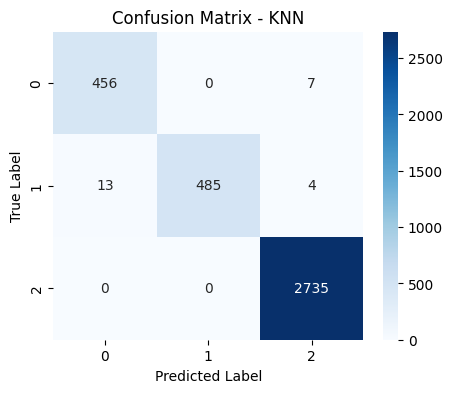

In [88]:
for name, model in tuned_models.items():
    print(f"\n> Evaluasi Model: {name}")

    # Prediksi dengan model terbaik
    y_pred = model.predict(x_test_scaled)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Gunakan 'weighted' untuk data tidak seimbang

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.



---
1.
Peningkatan accuracy dan f1-score pada model sebelum dan setelah tuning tidak terlalu signifikan. Hal tersebut tergambar seperti berikut:

lr: 0.9935 menjadi 0.9986

Dt: 0.9935 menjadi 0.9978

rf: 0.9935 menjadi 0.9984

knn: 0.9935 menjadi tetap


---

2.
Pada tiap model memiliki nilai precision dan recall yang tinggi. Tak hanya itu, pada evaluasi model yang telah dilakukan di atas menyatakan bahwa baik pada train set maupun test set memiliki nilai akurasi yg tinggi sehingga dapat disimpulkan tidak ditemukan adanya overfitting maupun underfitting


---

3.
Rekomendasi yang dapat diberikan sebagai berikut:
- SMOTE atau stratified cross-validation → Berguna untuk menangani data minoritas yang jarang muncul.
- Coba Gradient Boosting atau XGBoost → Bisa meningkatkan performa terutama untuk dataset dengan pola yang kompleks.
- Peningkatan data → Berguna jika data minoritas terlalu sedikit dan sulit diprediksi.
---
**Kesimpulan:**
Tidak ada overfitting/underfitting, tuning hanya memberikan sedikit peningkatan, dan model sudah cukup stabil. Logistic Regression dan Random Forest dapat memodelkan kasus lebih baik.